<a href="https://colab.research.google.com/github/bs3537/DS-Unit-2-Applied-Modeling/blob/master/V1_classification_exercise_XGBoost_Bhav_DengueAI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
#https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/

In [0]:
#Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. 

In [0]:
#Performance metric = mean absolute error

##LIST OF FEATURES:
You are provided the following set of information on a (year, weekofyear) timescale:

(Where appropriate, units are provided as a _unit suffix on the feature name.)

###City and date indicators
1. city – City abbreviations: sj for San Juan and iq for Iquitos
2. week_start_date – Date given in yyyy-mm-dd format
###NOAA's GHCN daily climate data weather station measurements
1. station_max_temp_c – Maximum temperature
2. station_min_temp_c – Minimum temperature
3. station_avg_temp_c – Average temperature
4. station_precip_mm – Total precipitation
5. station_diur_temp_rng_c – Diurnal temperature range

###PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

6. precipitation_amt_mm – Total precipitation

###NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

7. reanalysis_sat_precip_amt_mm – Total precipitation
8. reanalysis_dew_point_temp_k – Mean dew point temperature
9. reanalysis_air_temp_k – Mean air temperature
10. reanalysis_relative_humidity_percent – Mean relative humidity
11. reanalysis_specific_humidity_g_per_kg – Mean specific humidity
12. reanalysis_precip_amt_kg_per_m2 – Total precipitation
13. reanalysis_max_air_temp_k – Maximum air temperature
14. reanalysis_min_air_temp_k – Minimum air temperature
15. reanalysis_avg_temp_k – Average air temperature
16. reanalysis_tdtr_k – Diurnal temperature range

###Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements
17. ndvi_se – Pixel southeast of city centroid
18. ndvi_sw – Pixel southwest of city centroid
19. ndvi_ne – Pixel northeast of city centroid
20. ndvi_nw – Pixel northwest of city centroid

####TARGET VARIABLE = total_cases label for each (city, year, weekofyear)

In [0]:
import sys

In [0]:
#Load train features and labels datasets
train_features = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_features_train.csv')

In [7]:
train_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [8]:
train_features.shape

(1456, 24)

In [0]:
train_labels = pd.read_csv('https://s3.amazonaws.com/drivendata/data/44/public/dengue_labels_train.csv')

In [10]:
train_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [11]:
train_labels.shape

(1456, 4)

In [0]:
#Merge train features and labels datasets

In [0]:
train = pd.merge(train_features, train_labels)

In [14]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [15]:
train.shape
#city, year and week of year columns are duplicate in train_features and train_labels datasets so the total_cases column is added to the features dataset

(1456, 25)

In [16]:
train.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [17]:
train['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

In [18]:
dengue_cases = train['total_cases']
dengue_cases

0       4
1       5
2       4
3       3
4       6
       ..
1451    5
1452    8
1453    1
1454    1
1455    4
Name: total_cases, Length: 1456, dtype: int64

In [19]:
np.percentile(dengue_cases, 95)

81.25

In [0]:
#Thus, we can isolate a column with total_cases >81.25 as dengue outbreaks as they represent >2 S.D or > 95 percentile

In [0]:
#create a new column 'dengue_outbreak' with total_cases >81.25 and drop total_cases column
train['dengue_outbreak']  = train['total_cases'] > 81.25

In [0]:
#Can do Pandas profiling here

In [23]:
#Do train, val split
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['dengue_outbreak'], 
                              random_state=42, )
train.shape, val.shape

((1164, 26), (292, 26))

In [0]:
#Baseline statistics for the target variable total_cases in train dataset

In [25]:
train['dengue_outbreak'].value_counts(normalize=True)

False    0.950172
True     0.049828
Name: dengue_outbreak, dtype: float64

In [0]:
#Thus, dengue outbreaks occur only in 4.98% of cases in train dataset and are minority class

In [0]:
#we need to convert week_start_date to numeric form uisng pd.to_dateime function
#wrangle function 

def wrangle(X):
  X = X.copy()
       
    # Convert week_start_date to numeric form
  X['week_start_date'] = pd.to_datetime(X['week_start_date'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
  X['year_recorded'] = X['week_start_date'].dt.year
  X['month_recorded'] = X['week_start_date'].dt.month
  #X['day_recorded'] = X['week_start_date'].dt.day
  X = X.drop(columns='week_start_date')
  X = X.drop(columns='year')


  
#I engineered few features which represent standing water, high risk feature for mosquitos

  X['standing water feature 1'] = X['station_precip_mm'] / X['station_max_temp_c']
  X['total satellite vegetation index of city'] = X['ndvi_se'] + X['ndvi_sw'] + X['ndvi_ne'] + X['ndvi_nw']
 
    #2. standing water feature 2 = 'NOAA GCN precipitation amount in kg per m2 reanalyzed' * (total vegetation, sum of all 4 parts of the city)
  X['standing water feature 2'] = X['reanalysis_precip_amt_kg_per_m2'] * X['total satellite vegetation index of city'] 
    #3. standing water feature 3: 'NOAA GCN precipitation amount in kg per m2 reanalyzed'} * 'NOAA GCN mean relative humidity in pct reanalyzed'}
  X['standing water feature 3'] = X['reanalysis_precip_amt_kg_per_m2'] * X['reanalysis_relative_humidity_percent']   
    #4. standing water feature 4: 'NOAA GCN precipitation amount in kg per m2 reanalyzed'} * 'NOAA GCN mean relative humidity in pct reanalyzed'} * (total vegetation)
  X['standing water feature 4'] = X['reanalysis_precip_amt_kg_per_m2'] * X['reanalysis_relative_humidity_percent'] * X['total satellite vegetation index of city']  
    # 5. standing water feature 5: 'NOAA GCN precipitation amount in kg per m2 reanalyzed'} / 'NOAA GCN max air temp reanalyzed'
  X['standing water feature 5'] = X['reanalysis_precip_amt_kg_per_m2'] / X['reanalysis_max_air_temp_k']
    #6. standing water feature 6 (most imp): ['NOAA GCN precipitation amount in kg per m2 reanalyzed'} * 'NOAA GCN mean relative humidity in pct reanalyzed'} * (total vegetation)]/['NOAA GCN max air temp reanalyzed']
  X['standing water feature 6'] = X['reanalysis_precip_amt_kg_per_m2'] * X['reanalysis_relative_humidity_percent'] * X['total satellite vegetation index of city'] / X['reanalysis_max_air_temp_k']

#Rename columns
  X.rename(columns= {'reanalysis_air_temp_k':'Mean air temperature in K'}, inplace=True)
  X.rename(columns= {'reanalysis_min_air_temp_k':'Minimum air temperature in K'}, inplace=True)
  X.rename(columns= {'weekofyear':'Week of Year'}, inplace=True)
  X.rename(columns= {'station_diur_temp_rng_c':'Diurnal temperature range in C'}, inplace=True)
  X.rename(columns= {'reanalysis_precip_amt_kg_per_m2':'Total precipitation kg/m2'}, inplace=True)
  X.rename(columns= {'reanalysis_tdtr_k':'Diurnal temperature range in K'}, inplace=True)
  X.rename(columns= {'reanalysis_max_air_temp_k':'Maximum air temperature in K'}, inplace=True)
  X.rename(columns= {'year_recorded':'Year recorded'}, inplace=True)
  X.rename(columns= {'reanalysis_relative_humidity_percent':'Mean relative humidity'}, inplace=True)
  X.rename(columns= {'month_recorded':'Month recorded'}, inplace=True)
  X.rename(columns= {'reanalysis_dew_point_temp_k':'Mean dew point temp in K'}, inplace=True)
  X.rename(columns= {'precipitation_amt_mm':'Total precipitation in mm'}, inplace=True)
  X.rename(columns= {'station_min_temp_c':'Minimum temp in C'}, inplace=True)
  X.rename(columns= {'ndvi_se':'Southeast vegetation index'}, inplace=True)
  X.rename(columns= {'ndvi_ne':'Northeast vegetation index'}, inplace=True)
  X.rename(columns= {'ndvi_nw':'Northwest vegetation index'}, inplace=True)
  X.rename(columns= {'ndvi_sw':'Southwest vegetation index'}, inplace=True)
  X.rename(columns= {'reanalysis_avg_temp_k':'Average air temperature in K'}, inplace=True)
  X.rename(columns= {'reanalysis_sat_precip_amt_mm':'Total precipitation in mm 2'}, inplace=True)
  X.rename(columns= {'reanalysis_specific_humidity_g_per_kg':'Mean specific humidity'}, inplace=True)
  X.rename(columns= {'station_avg_temp_c':'Average temp in C'}, inplace=True)
  X.rename(columns= {'station_max_temp_c':'Maximum temp in C'}, inplace=True)
  X.rename(columns= {'station_precip_mm':'Station precipitation in mm'}, inplace=True)
  X = X.drop(columns='total_cases')
  X = X.drop(columns='Total precipitation in mm 2')

    # return the wrangled dataframe
  return X

train = wrangle(train)
val = wrangle(val)


In [29]:
train.head().T

,115,1360,950,186,406
city,sj,iq,iq,sj,sj
Week of Year,29,35,40,47,8
Northeast vegetation index,0.112,0.318186,0.33754,0.1071,NaN
Northwest vegetation index,0.1255,0.319767,0.276943,0.1818,0.0754
Southeast vegetation index,0.14214,0.308171,0.2775,0.260057,0.239571
Southwest vegetation index,0.182533,0.3236,0.25505,0.270586,0.2387
Total precipitation in mm,94.14,58.2,46.22,91.81,0
Mean air temperature in K,299.79,298.574,298.373,298.571,297.59
Average air temperature in K,299.829,300.143,300.5,298.679,297.836
Mean dew point temp in K,296.053,295.093,294.664,295.256,291.901


In [0]:
#Define target and features

In [0]:
# The status_group column is the target
target = 'dengue_outbreak'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]


In [33]:
pip install category_encoders

     |████████████████████████████████| 102kB 5.6MB/s 


In [0]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import model_selection, preprocessing

In [0]:
processor = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median')
)

In [0]:
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

In [0]:
model = XGBClassifier(n_estimators=200, eval_metric='auc', n_jobs=-1)

In [0]:
eval_set = [(X_train_processed, y_train),
            (X_val_processed, y_val)]

In [42]:
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.861851	validation_1-auc:0.619495
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.899599	validation_1-auc:0.619976
[2]	validation_0-auc:0.901719	validation_1-auc:0.616125
[3]	validation_0-auc:0.924635	validation_1-auc:0.711913
[4]	validation_0-auc:0.927628	validation_1-auc:0.743201
[5]	validation_0-auc:0.926662	validation_1-auc:0.741877
[6]	validation_0-auc:0.934199	validation_1-auc:0.714681
[7]	validation_0-auc:0.940731	validation_1-auc:0.724188
[8]	validation_0-auc:0.946569	validation_1-auc:0.737786
[9]	validation_0-auc:0.946748	validation_1-auc:0.716366
[10]	validation_0-auc:0.949796	validation_1-auc:0.720939
[11]	validation_0-auc:0.949889	validation_1-auc:0.720939
[12]	validation_0-auc:0.949936	validation_1-auc:0.721179
[13]	validation_0-auc:0.952165	validation_1-auc:0.720457
[14]	validation_0-auc:0.953334	validation_1-auc:0.72310

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

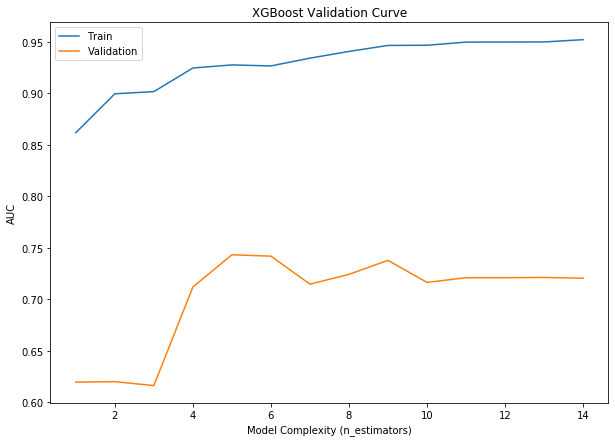

In [43]:
results = model.evals_result()
train_error = results['validation_0']['auc']
val_error = results['validation_1']['auc']

iterations = range(1, len(train_error) + 1)

plt.figure(figsize=(10,7))
plt.plot(iterations, train_error, label='Train')
plt.plot(iterations, val_error, label='Validation')
plt.title('XGBoost Validation Curve')
plt.ylabel('AUC')
plt.xlabel('Model Complexity (n_estimators)')
plt.legend();

In [45]:
#Validation accuracy
model.score(X_val_processed, y_val)

0.9452054794520548

In [0]:
#predict on X_val
y_pred = model.predict(X_val_processed)

In [0]:
# Predicted probabilities for positive class
y_pred_proba = model.predict_proba(X_val_processed)[:, 1] # Probability for positive class

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba)
#ROC-AUC score for positive class i.e dengue outbreak = 74.3%

0.7432009626955475

In [49]:
# Compute the confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[276,   1],
       [ 15,   0]])

In [50]:
pip install scikit-plot

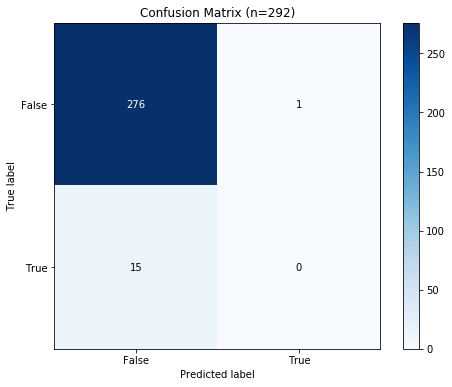

In [52]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_val, y_pred, 
                                    figsize=(8,6),
                                    title=f'Confusion Matrix (n={len(y_val)})',
                                    normalize=False);

In [0]:
# Predicted probabilities for positive class
y_pred_proba2 = model.predict_proba(X_val_processed)[:, 1] # Probability for positive class

In [0]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba2)

In [55]:
# See the results in a table
pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.573560
1,0.003610,0.000000,0.573560
2,0.010830,0.066667,0.459108
3,0.018051,0.066667,0.421226
4,0.036101,0.200000,0.408739
5,0.039711,0.200000,0.395849
6,0.054152,0.200000,0.386818
7,0.061372,0.200000,0.384718
8,0.064982,0.200000,0.382544
9,0.079422,0.266667,0.369662


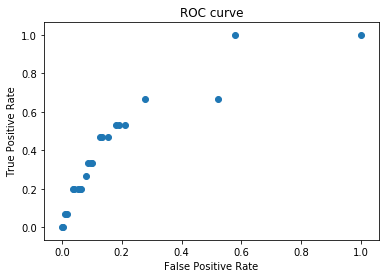

In [56]:
# See the results on a plot. 
# This is the "Receiver Operating Characteristic" curve
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [57]:
# Use scikit-learn to calculate the area under the curve.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_proba2)

0.7432009626955475

In [0]:
#Eli5 Permutation Importance Plot showing weights

In [58]:
pip install eli5

     |████████████████████████████████| 112kB 9.9MB/s 


In [61]:
import eli5
from eli5.sklearn import PermutationImportance
#Eli5 needs ordinal encoding
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median') 
)
X_train_transformed = pipeline.fit_transform(X_train)
X_val_transformed = pipeline.transform(X_val)

model = XGBClassifier(n_estimators=5, eval_metric='auc', n_jobs=-1)
model.fit(X_train_transformed, y_train)

permuter = PermutationImportance(
    model,
    scoring= 'accuracy',
    n_iter=5,
    random_state=42
)
permuter.fit(X_val_transformed, y_val)
permuter.feature_importances_
eli5.show_weights(
    permuter,
    top=None,
    feature_names=X_val.columns.tolist()
)

Weight,Feature
0 ± 0.0000,city
0 ± 0.0000,standing water feature 6
0 ± 0.0000,Northeast vegetation index
0 ± 0.0000,Northwest vegetation index
0 ± 0.0000,Southeast vegetation index
0 ± 0.0000,Southwest vegetation index
0 ± 0.0000,Total precipitation in mm
0 ± 0.0000,Average air temperature in K
0 ± 0.0000,Mean dew point temp in K
0 ± 0.0000,Maximum air temperature in K
